In [21]:
#import necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#visualize and safe figure
import matplotlib.pyplot as plt

#files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [22]:
mean_sort = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/GlobalModelData/df mean shap cv10.csv', sep=',', index_col=0)
median_sort = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/GlobalModelData/df median shap cv10.csv', sep=',', index_col=0)

In [23]:
mean_sort['rank sorted by mean shap'] = range(1, len(mean_sort)+1,1)
#rename columns
median_sort = median_sort.rename(columns={'rank':'rank sorted by median', 'name':'variable'})
#rename column
mean_sort = mean_sort.rename(columns={'rank':'rank sorted by mean shap'})
#merge datasets
df_new = pd.merge(mean_sort,median_sort,on='variable',how='outer')
#to list 
cols = df_new.columns.tolist()
cols = cols[1:] + cols[:1]
df_new = df_new[cols]

#rename columns
df_new = df_new.rename(columns={'rank sorted by median': 'rank sorted by median (CV=10)', 'rank sorted by mean shap': 'rank sorted by mean shap (CV=10)'})

## Visualize

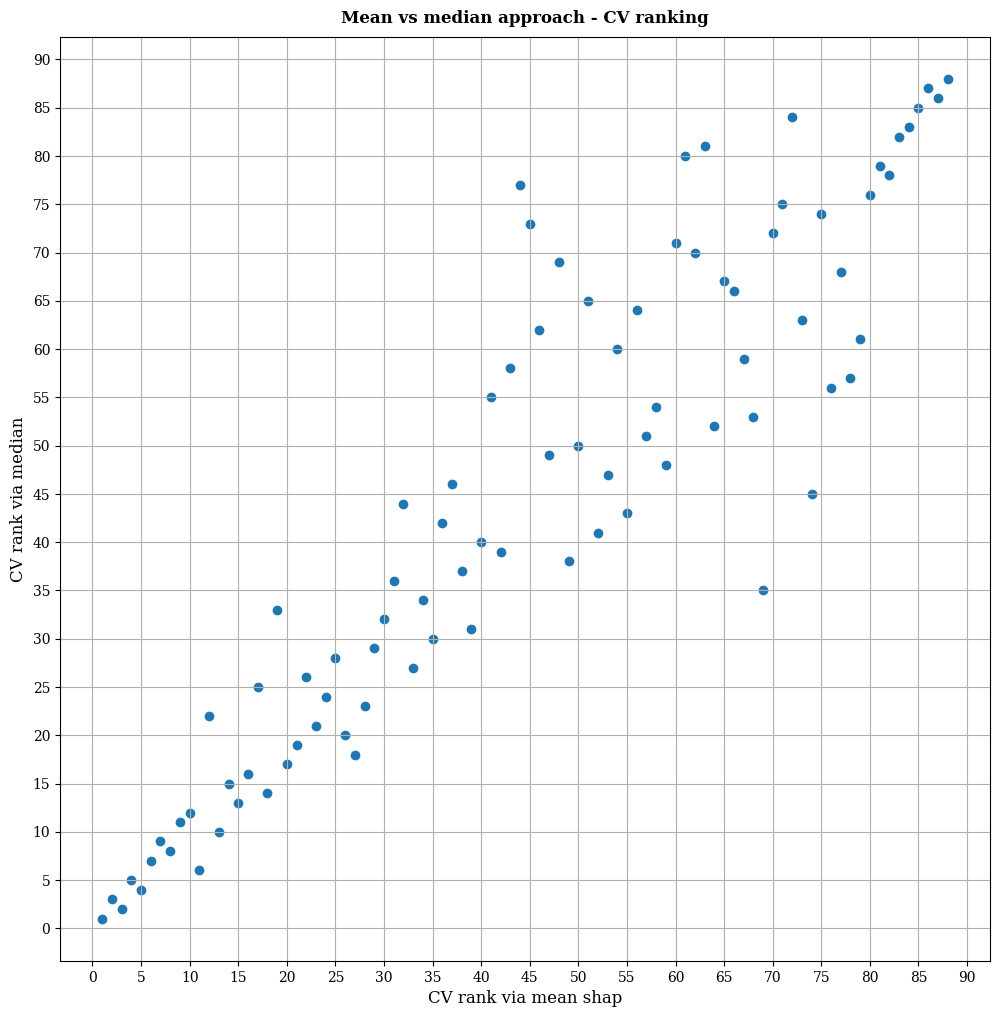

In [24]:
#assign to variables
x = df_new['rank sorted by mean shap (CV=10)']
y = df_new['rank sorted by median (CV=10)']

#define font
plt.rcParams["font.family"] = "serif"

plt.figure(figsize= (12,12))
plt.title("Mean vs median approach - CV ranking", fontweight='bold', pad=10)
plt.xlabel("CV rank via mean shap", fontsize=12)
plt.xticks(np.arange(min(x)-1, max(x)+5, 5))
plt.ylabel("CV rank via median", fontsize=12)
plt.yticks(np.arange(min(x)-1, max(x)+5, 5))
plt.grid()
plt.scatter(x, y)
plt.savefig('medianXmean_sept.jpg',bbox_inches='tight')